## Mengunduh dan Mengekstrak File

Untuk memulai analisis saya, saya akan mengunduh dan mengekstrak file yang diperlukan. Saya menggunakan perintah berikut:

```bash
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip


In [2]:
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip

Streaming output truncated to the last 5000 lines.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6

## Persiapan Data dan Visualisasi

Dalam langkah ini, saya mengimpor library yang diperlukan dan mendefinisikan jalur menuju direktori dataset yang berisi gambar-gambar rock, paper, dan scissors. Selanjutnya, saya menentukan kategori-kategori yang akan menjadi kelas-kelas dalam klasifikasi (rock, paper, scissors). Terakhir, saya menampilkan tiga contoh gambar secara acak dari setiap kategori untuk memberikan gambaran awal tentang dataset yang akan digunakan dalam pelatihan model klasifikasi. Ini membantu pemahaman awal tentang jenis gambar yang akan diolah oleh model.


In [6]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [7]:
data_path = '/content/rockpaperscissors/rps-cv-images/'

print(os.listdir(data_path))

['README_rpc-cv-images.txt', 'paper', 'scissors', 'rock']


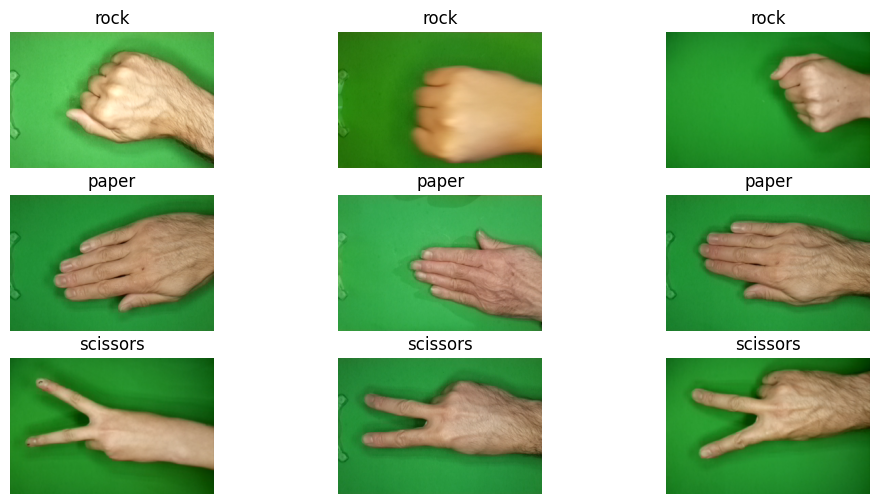

In [8]:
categories = ['rock', 'paper', 'scissors']

n = 3
fig, axes = plt.subplots(len(categories), n, figsize=(12, 6))

for i, category in enumerate(categories):
    category_dir = os.path.join(data_path, category)
    image_files = os.listdir(category_dir)

    random_images = random.sample(image_files, n)

    for j, image_file in enumerate(random_images):
        img = mpimg.imread(os.path.join(category_dir, image_file))
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        axes[i, j].set_title(category)

plt.show()


## Arsitektur Model dan Pelatihan

Pada langkah ini, saya mendefinisikan arsitektur model Neural Network yang akan digunakan untuk klasifikasi gambar tangan dalam kategori rock, paper, atau scissors. Model ini adalah model jaringan saraf konvolusi (Convolutional Neural Network/CNN) yang digunakan untuk pengenalan gambar.

Kemudian, saya menentukan konfigurasi pelatihan model dengan menggunakan loss function `categorical_crossentropy`, optimasi `adam`, dan metrik `accuracy`. Selain itu, saya mengatur penghentian pelatihan dini (`early stopping`) dengan memantau kerugian validasi (`val_loss`) dan mengambil model terbaik dengan pengingkatan monitor akurasi validasi (`val_accuracy`).

Di bawah ini adalah ringkasan dari arsitektur model yang telah didefinisikan.


In [9]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_accuracy", mode="max")

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 300, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')

])


In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 298, 16)      160       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 99, 149, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 147, 32)       4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 48, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 71, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 23, 35, 64)       

## Data Augmentation dan Pembagian Dataset

Pada tahap ini, saya menggunakan teknik Data Augmentation dengan bantuan `ImageDataGenerator` untuk memproses dataset gambar. Data Augmentation membantu meningkatkan kinerja model dengan menghasilkan variasi tambahan dari gambar-gambar yang ada.

Saya mengatur `rescale` ke 1/255 agar nilai piksel dalam gambar diubah menjadi rentang 0 hingga 1. Saya juga membagi dataset menjadi dua bagian, dengan 60% digunakan untuk pelatihan (training) dan 40% untuk validasi (validation).

Selanjutnya, saya membuat dua generator: `train_generator` untuk pelatihan dan `validation_generator` untuk validasi. Saya menentukan ukuran gambar target, ukuran batch, mode kelas ('categorical' karena kita melakukan klasifikasi multi-kelas), dan `color_mode` ke 'grayscale' karena gambar dalam skala abu-abu.

Selanjutnya, saya menggunakan `train_generator.next()` untuk mengambil satu batch data pelatihan dan menampilkan salah satu gambar contoh dari batch tersebut.

Dengan langkah-langkah ini, kita telah mempersiapkan dataset untuk pelatihan dan validasi, serta menerapkan Data Augmentation untuk meningkatkan variasi dataset.


In [18]:
_datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.4,
)

train_generator = _datagen.flow_from_directory(
    data_path,
    target_size=(200, 300),
    batch_size=128,
    class_mode='categorical',
    subset='training',
    color_mode='grayscale'
)

validation_generator = _datagen.flow_from_directory(
    data_path,
    target_size=(200, 300),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    color_mode='grayscale'
)

x, y = train_generator.next()
sample_image = x[0]
print("Shape of sample grayscale image:", sample_image.shape)


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.
Shape of sample grayscale image: (200, 300, 1)


## Pelatihan Model

Pada tahap ini, saya memulai proses pelatihan model. Saya menggunakan perintah `model.fit()` untuk melatih model dengan dataset pelatihan yang telah saya persiapkan sebelumnya. Saya mengatur berbagai parameter pelatihan seperti generator data pelatihan, jumlah langkah per epoch, jumlah epoch, verbosity, generator data validasi, dan callbacks untuk menghentikan pelatihan dini serta menyimpan model terbaik. Setelah pelatihan selesai, saya mencetak informasi mengenai epoch terakhir dan akurasi pada data pelatihan. Selanjutnya, saya mengukur akurasi pada data validasi dengan perintah `model.evaluate(validation_generator)` dan mencetak hasilnya. Dengan langkah-langkah ini, saya berhasil melatih model dengan dataset yang telah dipersiapkan, memonitor pelatihan, dan mengukur kinerja model pada data validasi.


In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples / train_generator.batch_size - 1,
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples / validation_generator.batch_size - 1,
    callbacks=[early_stop, checkpoint]
)

print(history.epoch, history.history['accuracy'][-1])


Epoch 1/15
10/9 [================================] - ETA: -5s - loss: 1.0994 - accuracy: 0.3263

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 95s 10s/step - loss: 1.0994 - accuracy: 0.3263 - val_loss: 1.0803 - val_accuracy: 0.3264
Epoch 2/15
9/9 [==============================] - 85s 9s/step - loss: 1.0080 - accuracy: 0.4696 - val_loss: 0.9429 - val_accuracy: 0.4016
Epoch 3/15
9/9 [==============================] - 91s 10s/step - loss: 0.6942 - accuracy: 0.7099 - val_loss: 0.4854 - val_accuracy: 0.8148
Epoch 4/15
9/9 [==============================] - 89s 10s/step - loss: 0.3930 - accuracy: 0.8440 - val_loss: 0.3264 - val_accuracy: 0.8958
Epoch 5/15
9/9 [==============================] - 91s 10s/step - loss: 0.2740 - accuracy: 0.8988 - val_loss: 0.3074 - val_accuracy: 0.8900
Epoch 6/15
9/9 [==============================] - 83s 9s/step - loss: 0.1919 - accuracy: 0.9368 - val_loss: 0.2325 - val_accuracy: 0.9259
Epoch 7/15
9/9 [==============================] - 89s 10s/step - loss: 0.1742 - accuracy: 0.9427 - val_loss: 0.2094 - val_accuracy: 0.9352
Epoch 8/15
9/9 [========================

In [20]:
validation_accuracy = model.evaluate(validation_generator)
print("Akurasi pada data validasi:", validation_accuracy[1])

28/28 [==============================] - 15s 515ms/step - loss: 0.1891 - accuracy: 0.9680
Akurasi pada data validasi: 0.9679633975028992


## Melakukan Prediksi dengan Model

Dalam langkah ini, saya enggunakan model yang telah dilatih untuk melakukan prediksi pada gambar yang baru. Saya memuat gambar tersebut dari direktori yang telah ditentukan menggunakan `tf.keras.preprocessing.image.load_img()` dan mengubahnya menjadi bentuk yang dapat dimasukkan ke dalam model dengan bantuan `tf.keras.preprocessing.image.img_to_array()`. Saya juga menormalkan nilai piksel gambar dengan membaginya dengan 255.0 dan menambahkan dimensi batch dengan `np.expand_dims()` agar sesuai dengan format yang diterima oleh model.

Kemudian, saya menggunakan model untuk melakukan prediksi kelas gambar tersebut dengan `model.predict()`. Hasil prediksi saya konversi menjadi label kelas yang sesuai dengan daftar kelas yang telah ditentukan.

Terakhir, saya menampilkan gambar tersebut beserta label prediksi pada plot dengan menggunakan `plt.imshow()` dan `plt.title()`. Dengan langkah-langkah ini, saya dapat menguji model saya pada gambar baru dan menampilkan hasil prediksi dengan visual.



1/1 [==============================] - 0s 63ms/step


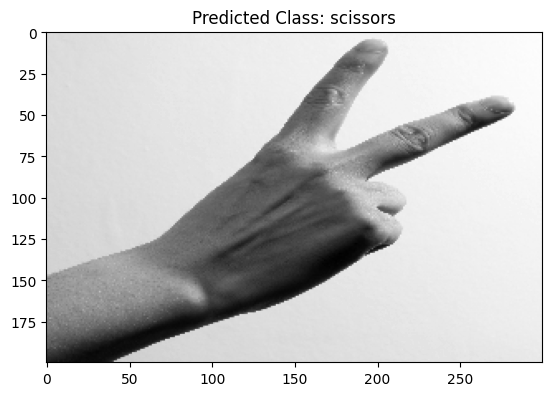

In [25]:
image_path = '/content/test_predict.png'

img = tf.keras.preprocessing.image.load_img(image_path, target_size=(200, 300), color_mode="grayscale")
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)

class_labels = ['paper', 'rock', 'scissors']
predicted_class = class_labels[np.argmax(predictions)]

plt.imshow(img, cmap='gray')
plt.title(f'Predicted Class: {predicted_class}')
plt.show()


## Kesimpulan

Dalam notebook ini, saya telah melakukan sejumlah langkah penting dalam pembuatan model klasifikasi gambar tangan yang mampu mengenali gestur batu, kertas, dan gunting. Langkah-langkah tersebut meliputi:

1. **Persiapan Data**: Saya memuat dataset gambar tangan dan melakukan visualisasi awal untuk memahami isi dataset.

2. **Definisi Model**: Saya mendefinisikan arsitektur model Convolutional Neural Network (CNN) yang digunakan untuk klasifikasi gambar. Model ini dirancang untuk pengenalan pola dalam gambar.

3. **Data Augmentation**: Saya menerapkan teknik Data Augmentation untuk memperkaya variasi dataset pelatihan dan menghindari overfitting.

4. **Pelatihan Model**: Saya melatih model dengan dataset pelatihan, memantau pelatihan dengan callbacks, dan mengukur akurasi pada dataset validasi.

5. **Prediksi Gambar Baru**: Saya menggunakan model yang telah dilatih untuk melakukan prediksi pada gambar baru dan menampilkan hasil prediksi.

Selain itu, saya juga telah menggunakan berbagai library dan teknik di dalam lingkungan TensorFlow dan Python untuk mencapai tujuan saya.

Dengan demikian, saya berhasil mengimplementasikan solusi yang efektif untuk tugas klasifikasi gambar ini.


# Profil Dicoding

- **Nama:** Mohammad Idris Arif Budiman
- **Email:** [m.idrisab01@gmail.com](mailto:m.idrisab01@gmail.com)
